In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
# Load dataset

def load_data():
    df = pd.read_csv("converted_mushroom_dataset.csv")
    return df

df = load_data()


In [3]:
# Encode categorical features
X = df.drop("class", axis=1)
y = df["class"]

In [4]:
encoders = {}
for column in X.columns:
    if X[column].dtype == "object":
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        encoders[column] = le

In [5]:
# Encode target
label_y = LabelEncoder()
y = label_y.fit_transform(y)

In [6]:
# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5

Confusion Matrix:
 [[154 131]
 [169 146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.54      0.51       285
           1       0.53      0.46      0.49       315

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



In [10]:
import joblib
import os


# Save the trained model
joblib.dump(model, "random_forest_model.pkl")

# Save the label encoder for the target
joblib.dump(label_y, "label_y_encoder.pkl")

# Save all feature encoders
for col, enc in encoders.items():
    joblib.dump(enc, f"encoder_{col}.pkl")

print("Model and encoders saved successfully.")


Model and encoders saved successfully.


Confusion Matrix


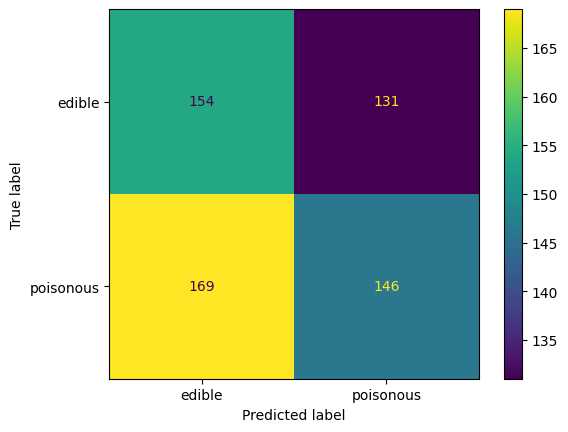

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Only show after prediction
y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix")
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_y.classes_)
disp.plot(ax=ax)


Class Distribution


C:\Users\sneha\AppData\Local\Temp\ipykernel_4376\3676854606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="pastel", ax=ax)


Text(0.5, 1.0, 'Mushroom Class Distribution (Edible vs Poisonous)')

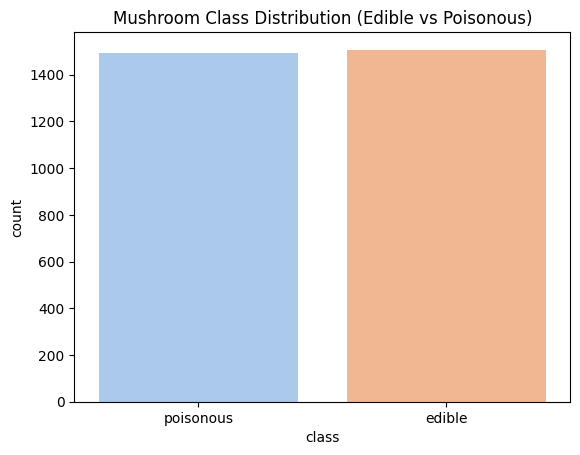

In [16]:

import seaborn as sns

print("Class Distribution")
fig, ax = plt.subplots()
sns.countplot(x="class", data=df, palette="pastel", ax=ax)
ax.set_title("Mushroom Class Distribution (Edible vs Poisonous)")

